In [305]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [306]:
df=pd.read_csv("C:/Users/win10/Downloads/traces_data (1).csv")

In [400]:
df.shape

(183611, 7)

In [ ]:
#First we will clean the data until it is in required format

In [307]:
df.head()

,Timestamp,traceID,spanID,parentSpanID,serviceName,Name,durationNano
2023-11-23 04:42:32.707303516,d8d992638d73274d0a6710a1f9d17f93,0d87dcf5ea5aeaab,NaN,featureflagservice,/,887477,NaN
2023-11-23 04:42:32.707459680,d8d992638d73274d0a6710a1f9d17f93,bd0a6f75f1a901b7,0d87dcf5ea5aeaab,featureflagservice,featureflagservice.repo.query:featureflags,481634,NaN
2023-11-23 04:42:33.930086000,fab7ab123d61c8d7d71062fc44ffb87e,fe4acd4c8a763d24,NaN,frontend-proxy,ingress,213000,NaN
2023-11-23 04:42:36.928455000,39a34f6b196aa69cdd5364bfc73b35b4,b3c68f9f4a73524b,NaN,frontend-proxy,ingress,602000,NaN
2023-11-23 04:42:39.923633000,61e0ffa4c695a832b05f406999cf319c,b204b9bce1b3ac35,NaN,frontend-proxy,ingress,556000,NaN


In [308]:
df.columns=["Timestamp","traceID","spanID","parentSpanID","serviceName","Name","durationNano"]

In [309]:
df.head()

,Timestamp,traceID,spanID,parentSpanID,serviceName,Name,durationNano
2023-11-23 04:42:32.707303516,d8d992638d73274d0a6710a1f9d17f93,0d87dcf5ea5aeaab,NaN,featureflagservice,/,887477,NaN
2023-11-23 04:42:32.707459680,d8d992638d73274d0a6710a1f9d17f93,bd0a6f75f1a901b7,0d87dcf5ea5aeaab,featureflagservice,featureflagservice.repo.query:featureflags,481634,NaN
2023-11-23 04:42:33.930086000,fab7ab123d61c8d7d71062fc44ffb87e,fe4acd4c8a763d24,NaN,frontend-proxy,ingress,213000,NaN
2023-11-23 04:42:36.928455000,39a34f6b196aa69cdd5364bfc73b35b4,b3c68f9f4a73524b,NaN,frontend-proxy,ingress,602000,NaN
2023-11-23 04:42:39.923633000,61e0ffa4c695a832b05f406999cf319c,b204b9bce1b3ac35,NaN,frontend-proxy,ingress,556000,NaN


In [310]:
df.reset_index().head(2)

,index,Timestamp,traceID,spanID,parentSpanID,serviceName,Name,durationNano
0,2023-11-23 04:42:32.707303516,d8d992638d73274d0a6710a1f9d17f93,0d87dcf5ea5aeaab,NaN,featureflagservice,/,887477,NaN
1,2023-11-23 04:42:32.707459680,d8d992638d73274d0a6710a1f9d17f93,bd0a6f75f1a901b7,0d87dcf5ea5aeaab,featureflagservice,featureflagservice.repo.query:featureflags,481634,NaN


In [311]:
df = df.iloc[:, :-1].rename(columns={'index': 'Timestamp', 'Timestamp': 'traceID', 'traceID': 'spanID', 'spanID': 'parentSpanID', 'parentSpanID': 'serviceName', 'serviceName': 'Name','Name':"durationNano"})

In [312]:
df.reset_index(inplace=True)  # Resetting index and moving it to a regular column
df.rename(columns={'index': 'Timestamp'}, inplace=True)  # R

In [313]:
df.head()

,Timestamp,traceID,spanID,parentSpanID,serviceName,Name,durationNano
0,2023-11-23 04:42:32.707303516,d8d992638d73274d0a6710a1f9d17f93,0d87dcf5ea5aeaab,NaN,featureflagservice,/,887477
1,2023-11-23 04:42:32.707459680,d8d992638d73274d0a6710a1f9d17f93,bd0a6f75f1a901b7,0d87dcf5ea5aeaab,featureflagservice,featureflagservice.repo.query:featureflags,481634
2,2023-11-23 04:42:33.930086000,fab7ab123d61c8d7d71062fc44ffb87e,fe4acd4c8a763d24,NaN,frontend-proxy,ingress,213000
3,2023-11-23 04:42:36.928455000,39a34f6b196aa69cdd5364bfc73b35b4,b3c68f9f4a73524b,NaN,frontend-proxy,ingress,602000
4,2023-11-23 04:42:39.923633000,61e0ffa4c695a832b05f406999cf319c,b204b9bce1b3ac35,NaN,frontend-proxy,ingress,556000


In [314]:

# Apply the function to the 'Timestamp' column
df['Timestamp'] = df['Timestamp'].apply(lambda x: str(x).rsplit('.', 1)[0])


In [315]:
df.head()

,Timestamp,traceID,spanID,parentSpanID,serviceName,Name,durationNano
0,2023-11-23 04:42:32,d8d992638d73274d0a6710a1f9d17f93,0d87dcf5ea5aeaab,NaN,featureflagservice,/,887477
1,2023-11-23 04:42:32,d8d992638d73274d0a6710a1f9d17f93,bd0a6f75f1a901b7,0d87dcf5ea5aeaab,featureflagservice,featureflagservice.repo.query:featureflags,481634
2,2023-11-23 04:42:33,fab7ab123d61c8d7d71062fc44ffb87e,fe4acd4c8a763d24,NaN,frontend-proxy,ingress,213000
3,2023-11-23 04:42:36,39a34f6b196aa69cdd5364bfc73b35b4,b3c68f9f4a73524b,NaN,frontend-proxy,ingress,602000
4,2023-11-23 04:42:39,61e0ffa4c695a832b05f406999cf319c,b204b9bce1b3ac35,NaN,frontend-proxy,ingress,556000


In [316]:
df["serviceName"].value_counts()

frontend                 65758
cartservice              25834
productcatalogservice    20934
loadgenerator            16852
checkoutservice          13750
featureflagservice        7623
recommendationservice     6032
frontend-proxy            4836
emailservice              4016
adservice                 3523
paymentservice            3337
shippingservice           3012
quoteservice              3010
currencyservice           2860
accountingservice         1004
frauddetectionservice     1004
frontend-web               230
Name: serviceName, dtype: int64

In [317]:
#Which service took the highest and duration to complete
df[df["durationNano"]==df["durationNano"].max()]

,Timestamp,traceID,spanID,parentSpanID,serviceName,Name,durationNano
49250,2023-11-23 04:24:37,6bb93cf92f5f3f3593f6847745e3e432,a91500bbba2e32b3,NaN,frontend-proxy,ingress,4999858000


In [318]:
#Which service took the lowest duration to complete
df[df["durationNano"]==df["durationNano"].min()]

,Timestamp,traceID,spanID,parentSpanID,serviceName,Name,durationNano
94720,2023-11-23 02:51:28,8bdd4dff27c75190f5308c9ad9953b31,f846ade020ff6673,NaN,frontend-web,click,0
94762,2023-11-23 02:51:29,0865e39b39e074bd7e1326bcc6108f37,d41ed0940082ab93,NaN,frontend-web,click,0
94897,2023-11-23 02:51:31,5559c3a5875f8090f06aa9d36f16cf6f,ed9f130963eb46bc,NaN,frontend-web,click,0
94945,2023-11-23 02:51:31,5071b99716c23d9e2d3acc5c40765832,16c5a1b6d499d222,NaN,frontend-web,click,0
94946,2023-11-23 02:51:31,357ef585415c792b3451a58f4b1725ef,c18393c9c9166564,NaN,frontend-web,click,0
95010,2023-11-23 02:51:32,6b8f327f6c2fb7343fd6ab16eb9d3fe9,5115dbe6faf1207a,NaN,frontend-web,click,0
95238,2023-11-23 02:51:37,00d61cb587565b79017dabe39cee07af,6310a879457c1764,NaN,frontend-web,click,0
95239,2023-11-23 02:51:37,469ec40382033c2f23104f65d5b484ba,9f5a4f489f4abbd6,NaN,frontend-web,click,0
95308,2023-11-23 02:51:39,bccb76c7ae5708800cf4551c3a8534e7,aaf992f3d2216488,NaN,frontend-web,click,0
95345,2023-11-23 02:51:41,52940ca8d42b1c25f03e32c0f621d826,e58f3616e9a409ae,NaN,frontend-web,click,0


In [319]:
'''By tracking the same traceID across multiple entries, 
we can reconstruct the entire journey of a specific request as it traverses through the system. 
This helps in debugging and understanding the flow of requests.'''

'By tracking the same traceID across multiple entries, \nwe can reconstruct the entire journey of a specific request as it traverses through the system. \nThis helps in debugging and understanding the flow of requests.'

In [359]:
df["traceID"].value_counts().head(10)

1b2c4f69509ad823337ed8f176331e2b    62
d5f8b99248c2d38664363ff29589bd72    62
61e54cdbd7d9de6aa0208c2cc5953564    62
5fb9e107ca2e5f5c427fcbaf72589bf4    62
2ab3c6bf0f95b57c0db464511d5a1a3e    62
e09979235176a21e865a4a6ff9d8865d    62
866684a2b8475e29b6c2b1119d217b27    62
6fc27a951bea4e5cf5a70f03532f377a    62
c4b9a0fdf62c755a8010fd65758cda07    62
ffbe6b6a353341c3956500bfb42a6a28    62
Name: traceID, dtype: int64

In [322]:
n=input("enter the traceid")
# n = int(n)
df.groupby("traceID").get_group(n)

enter the traceid1f2fae8467906870310cea93db646b1b


,Timestamp,traceID,spanID,parentSpanID,serviceName,Name,durationNano
146566,2023-11-23 03:21:54,1f2fae8467906870310cea93db646b1b,15dd49ffc1cdbc1e,1dc41891409b8eae,frontend,grpc.oteldemo.CheckoutService/PlaceOrder,29538048
146567,2023-11-23 03:21:54,1f2fae8467906870310cea93db646b1b,1dc41891409b8eae,NaN,frontend,HTTP POST,37913600
146568,2023-11-23 03:21:54,1f2fae8467906870310cea93db646b1b,87bc7d8a48c0611e,15dd49ffc1cdbc1e,checkoutservice,oteldemo.CheckoutService/PlaceOrder,28719216
146569,2023-11-23 03:21:54,1f2fae8467906870310cea93db646b1b,12a22539e8385510,87bc7d8a48c0611e,checkoutservice,prepareOrderItemsAndShippingQuoteFromCart,21363144
146570,2023-11-23 03:21:54,1f2fae8467906870310cea93db646b1b,54a3d686671ddf2b,12a22539e8385510,checkoutservice,oteldemo.CartService/GetCart,1315816
...,...,...,...,...,...,...,...
146623,2023-11-23 03:21:55,1f2fae8467906870310cea93db646b1b,eabecc8d81b82f2d,383813e6b342ca22,productcatalogservice,oteldemo.ProductCatalogService/GetProduct,10663
146624,2023-11-23 03:21:55,1f2fae8467906870310cea93db646b1b,d59f49a484adc41f,f45bb8febd2253f4,productcatalogservice,oteldemo.ProductCatalogService/GetProduct,7143648
146625,2023-11-23 03:21:55,1f2fae8467906870310cea93db646b1b,476d702a014c4abe,d59f49a484adc41f,productcatalogservice,oteldemo.FeatureFlagService/GetFlag,7033693
146626,2023-11-23 03:21:55,1f2fae8467906870310cea93db646b1b,8688fe5814c9b70c,476d702a014c4abe,featureflagservice,/oteldemo.FeatureFlagService/GetFlag,610958


In [323]:
df["parentSpanID"].value_counts()

d1783a9be93930b7    59
d7d27bf87b2ccf8b    19
db11eaa9e76ff8aa    17
5d746ecc99184252    11
cd0cbbb33a062979    11
                    ..
5af930f24ae858d9     1
ccda23ec9696b657     1
bcd1a97fb3161999     1
151e34f4ab9bc315     1
2f7d3638d3ad3342     1
Name: parentSpanID, Length: 107233, dtype: int64

In [324]:
#Likewise we can find the SpanID's with the same parentspanID
'''The "parentSpanID" field indicates the relationship between spans within the same trace.
By analyzing these relationships, we can understand the hierarchical structure of requests and 
how different parts of the system interact with each other.'''
parentspanID=input("enter the parentspanID")
df[df["parentSpanID"]==parentspanID]["spanID"]

enter the parentspanIDd1783a9be93930b7


4989    9b830747b80817ed
4990    39ef799a0966d511
4994    9b6e3157bdee4c5f
4995    69b89a9ef520c642
4996    30782f5920aa67cb
4997    b254a1452c30a17d
4998    b564545662c32df7
4999    f904e25d4e8d27aa
5000    3fb7a71069d61a31
5001    0726cca25473fa75
5002    d84f7b16004d8518
5003    69084762a8949983
5004    f4d0966a95744992
5005    80bca5c2d6a73586
5006    cccb5b3510511614
5007    e7f70e76876af8e1
5008    a614518d80b64143
5009    fecb8bb0267508b0
5010    9b18ee87a7f73035
5011    649094b0993b80b4
5012    991ef6c9bf70a37e
5013    254fb006a0bed075
5014    f5a968e084a033a3
5015    914137c004377023
5016    441a9fa29c6891b8
5017    2c297de8c7c8c4ef
5018    ac414a8f99fa47e4
5019    98ed015a37e4c86d
5020    e3277098344877c1
5021    0280d1ab7f603c93
5022    d2129d5f7ba4bbad
5023    c9b82ac00c300d7c
5024    2fbb07d4c81a0e26
5025    fb432e30cb41a9f0
5026    19cd8e53d34a8603
5027    7780ed7a8297ac4c
5028    c6c5bc67b6cf1be5
5029    4153f8626058bf2f
5030    743c74aadcc66191
5031    8ea5124c6d8bf87f


In [325]:
df["Name"].value_counts()

HTTP GET                                          41311
oteldemo.ProductCatalogService/GetProduct         19453
grpc.oteldemo.ProductCatalogService/GetProduct    15741
HTTP POST                                         12938
HGET                                               8440
                                                  ...  
dns.lookup                                            3
tcp.connect                                           3
documentLoad                                          2
fs existsSync                                         2
documentFetch                                         2
Name: Name, Length: 66, dtype: int64

In [326]:
'''The "Name" field provides information about the specific operation or
endpoint being called within each service. This helps in understanding the 
flow of requests and identifying which parts of the system are being utilized the most.'''
name=input("enter the name")
df[df["Name"]==name]["serviceName"].unique()

enter the nameHTTP GET


array(['loadgenerator', 'frontend', 'frontend-web', 'featureflagservice'],
      dtype=object)

In [327]:
'''Likewise we can find which all spans are running concurrently within the same trace.
By analyzing the timestamps of different spans within the same trace or
across different traces, we can infer the level of concurrency and parallelism in the system'''
traceID=input("enter the traceID")
df[df["traceID"]==traceID]["spanID"].unique()

enter the traceID1f2fae8467906870310cea93db646b1b


array(['15dd49ffc1cdbc1e', '1dc41891409b8eae', '87bc7d8a48c0611e',
       '12a22539e8385510', '54a3d686671ddf2b', 'de6627f3edd0cfb4',
       'f83db34e003f67d8', 'f93744c918b57307', '7a0e2e8e34101d3e',
       'b78eb374b2cba470', 'ce1dcdffbaf2ea73', '06be710c46695472',
       'c9ceeb1776d0bec0', 'bd7361db17a1672f', '8fbdcaafbfe4b443',
       '302999b31ac07a61', 'bded56cd867c5c96', '200ef5f42c9a7b2a',
       '6aacf4124896e82a', '9e8ef8efc2b4232b', '3b8b370dd4fe933f',
       '206e68cc0e9ca5a3', '3c3fa39fe19ddf75', '5028cbb36f5c3203',
       '01dd85315ca2f116', '05fe24d022237997', '5f393fa3df60f8c4',
       '9cbc1e407d944147', '16f1fe5993e913f8', 'e243b949e421fd8b',
       'f8526dd78b210f0b', 'd7d15c109dc59061', '3331146be20f71a9',
       '576de2a1e497ecb3', 'ddaf19ffc181e1f2', 'dd92691a41465feb',
       '39ffb61c695e3236', '298519ce46eb62ea', 'aa1ef0d21d27ca88',
       '92911183712d3185', '8d3f64bfd84effc9', '444297021d6bfddc',
       '419928f9c7b25522', '0521e3a64861a279', 'feb2e8615afb64

In [ ]:
''' By examining spans with unusually high durations we can identify potential errors
or issues occurring within the system.This helps in debugging and improving the overall
reliability of the microservices.'''


In [328]:
# Filter spans with unusually high durations (e.g., durationNano greater than a threshold)
high_duration_threshold = 50000000  # Assuming a threshold of 50000000 milliseconds
high_duration_spans = df[df['durationNano'] > high_duration_threshold]

In [329]:
high_duration_spans

,Timestamp,traceID,spanID,parentSpanID,serviceName,Name,durationNano
3603,2023-11-23 02:34:57,0a4c8b2a204f67623bcfbda629a07fc5,e399d5dba0602199,NaN,loadgenerator,HTTP GET,2980831627
3605,2023-11-23 02:34:58,605b2ed4e56586df16602ef85673fc83,2da5f946176ae936,NaN,loadgenerator,HTTP GET,1980473681
3606,2023-11-23 02:34:59,86d69278c14a4670bb1be847e7ea5184,af231ec03fdf53f2,NaN,loadgenerator,HTTP GET,1556061636
3607,2023-11-23 02:34:59,7ccb42abf04c59bcf42ae9b992bcbbf9,84a19b54e2061b6e,NaN,loadgenerator,HTTP GET,984197491
3615,2023-11-23 02:35:00,e05754f6b1558aaeeecd1ca6a719eba4,a90b8faa2b14904c,NaN,loadgenerator,HTTP POST,206102584
...,...,...,...,...,...,...,...
180972,2023-11-23 03:43:20,1bf9e2ccdd0e9f199514e93baca3911e,073a984cf454f60f,eb374a581990319f,frontend,HTTP GET,59650048
182648,2023-11-23 03:44:18,31636beeaee41e94c6ef75554a68cf08,1511544b377416e7,NaN,loadgenerator,HTTP GET,50349841
183230,2023-11-23 03:44:36,acb54c0e2e5084f157da0c5ed181afa1,a1620198220b1297,NaN,loadgenerator,HTTP GET,50072531
183253,2023-11-23 03:44:36,534692a52c39680ed0a43556b64e9826,c49db81fbc77b295,NaN,loadgenerator,HTTP GET,50915341


<AxesSubplot:>

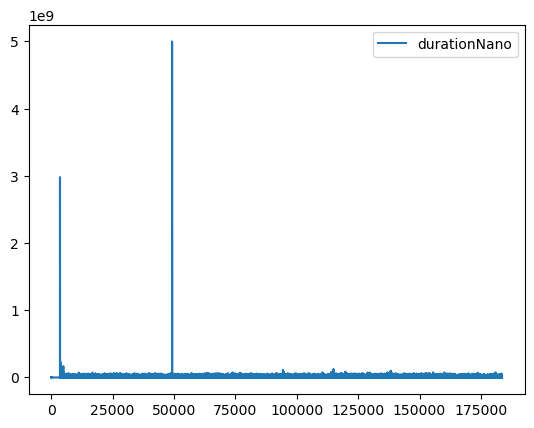

In [330]:
df.plot()

In [ ]:
#We observe outliers here ,after removing these outliers only we will be able to see the plot


C:\Users\win10\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


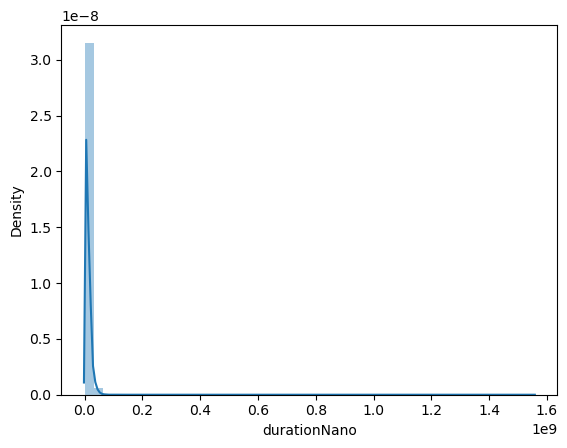

In [347]:
sns.distplot(df["durationNano"],kde=True)
plt.show()

In [ ]:
#fig above shows lognormal disribution,
#we can convert to normal distribution by using any of the transformation

In [395]:
#univariate analysis
#display the top 10 traceid that are highly used in the system

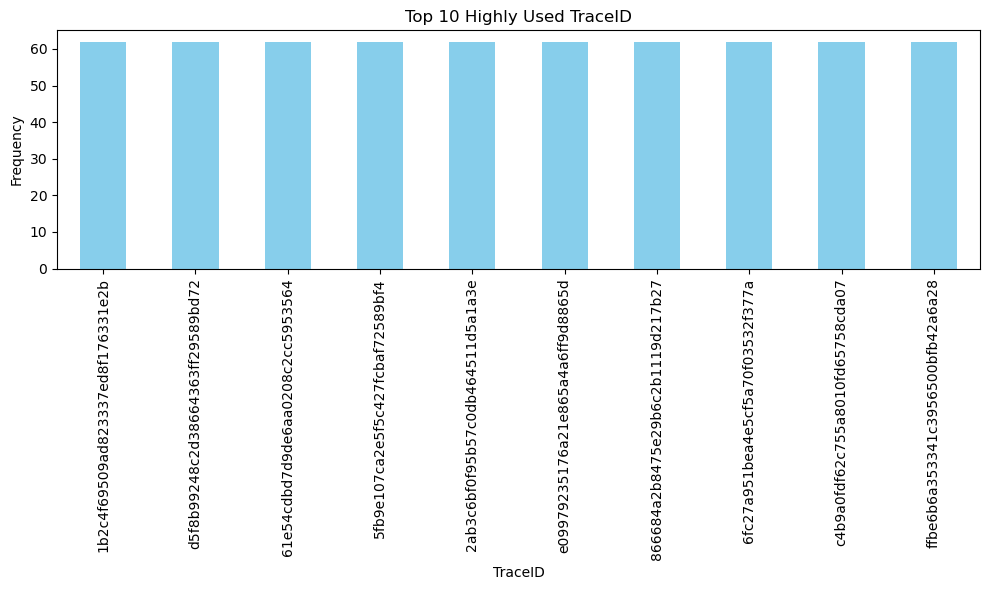

In [382]:
# Get the top 10 traceID that are highly used
top_traceID = df['traceID'].value_counts().head(10)

# Plot the bar plot
plt.figure(figsize=(10, 6))
top_traceID.plot(kind='bar', color='skyblue')
plt.title('Top 10 Highly Used TraceID')
plt.xlabel('TraceID')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

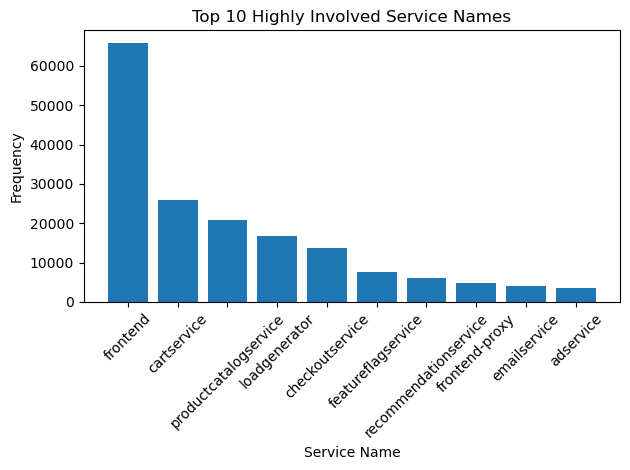

In [370]:
#display the top serviceName that are highly involved in activities
plt.bar(df["serviceName"].value_counts()[:10].index,df["serviceName"].value_counts()[:10].values)
plt.title('Top 10 Highly Involved Service Names')
plt.xlabel('Service Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

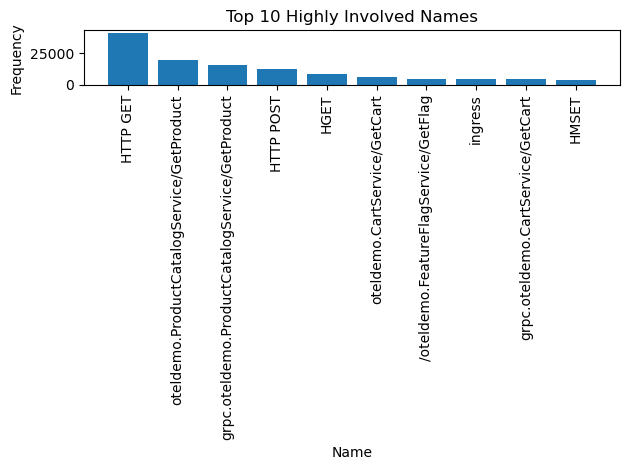

In [381]:
#Which are the names of the top functions beings accessed 
#display the top serviceName that are highly involved in activities
plt.bar(df["Name"].value_counts()[:10].index,df["Name"].value_counts()[:10].values)
plt.title('Top 10 Highly Involved Names')
plt.xlabel('Name')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

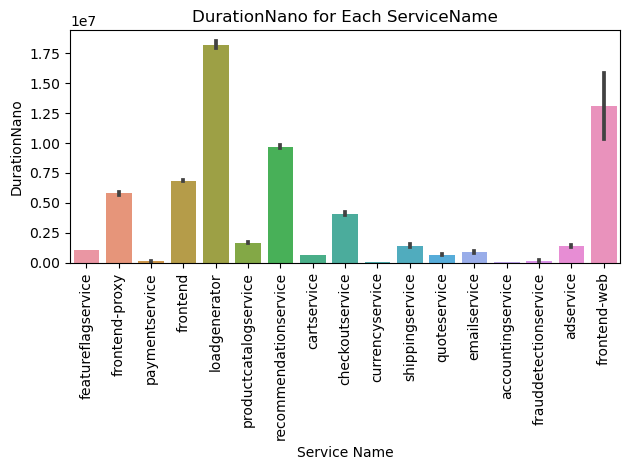

In [380]:
#bivariate analysis
#Which are the microservice that are having the highest duration
sns.barplot(x=df["serviceName"],y=df["durationNano"],data=df)
plt.xticks(rotation=90)  # Rotate x-axis labels to 45 degrees
plt.title('DurationNano for Each ServiceName')
plt.xlabel('Service Name')
plt.ylabel('DurationNano')
plt.tight_layout()
plt.show()

In [386]:
df.describe()

,durationNano
count,1.836110e+05
mean,5.333570e+06
std,9.526311e+06
min,0.000000e+00
25%,3.356500e+05
50%,1.584896e+06
75%,6.831676e+06
max,1.556062e+09


In [388]:
iqr=np.quantile(df["durationNano"],0.75)-np.quantile(df["durationNano"],0.25)
lower_lim=np.quantile(df["durationNano"],0.25)-1.5*iqr
upper_lim=np.quantile(df["durationNano"],0.75)+1.5*iqr

In [389]:
df.loc[df["durationNano"]<lower_lim]

,Timestamp,traceID,spanID,parentSpanID,serviceName,Name,durationNano


In [393]:
df.loc[df["durationNano"]>upper_lim]

,Timestamp,traceID,spanID,parentSpanID,serviceName,Name,durationNano
3606,2023-11-23 02:34:59,86d69278c14a4670bb1be847e7ea5184,af231ec03fdf53f2,NaN,loadgenerator,HTTP GET,1556061636
3607,2023-11-23 02:34:59,7ccb42abf04c59bcf42ae9b992bcbbf9,84a19b54e2061b6e,NaN,loadgenerator,HTTP GET,984197491
3609,2023-11-23 02:35:00,3aeebc9a1f17e194d78f04d14977e58f,b620acf9768c3cd4,NaN,loadgenerator,HTTP GET,17417895
3615,2023-11-23 02:35:00,e05754f6b1558aaeeecd1ca6a719eba4,a90b8faa2b14904c,NaN,loadgenerator,HTTP POST,206102584
3616,2023-11-23 02:35:00,54205dad47586f74fba2bd946f25f8e2,26d522a6492f5b84,NaN,loadgenerator,HTTP GET,35208282
...,...,...,...,...,...,...,...
183570,2023-11-23 03:44:50,874439d0e71fc74d17793c547998044c,dddd322b38ef9c1d,NaN,loadgenerator,HTTP POST,20885994
183571,2023-11-23 03:44:50,874439d0e71fc74d17793c547998044c,c554a8beba0d3053,dddd322b38ef9c1d,frontend,HTTP POST,19646976
183573,2023-11-23 03:44:50,d39c8d5c2028c57812ba31c2f2093b81,322a109a4f8c2b8f,NaN,frontend,HTTP POST,17287424
183595,2023-11-23 03:44:50,4d45a4d63d5ec0498c01d532d077ef21,efa40483424b6f3d,NaN,loadgenerator,HTTP GET,19160113


In [ ]:
#Above are the outliers to the system..holding more information
# pd.set_option("display.max_rows",None)
#We can use the above command to display all rows

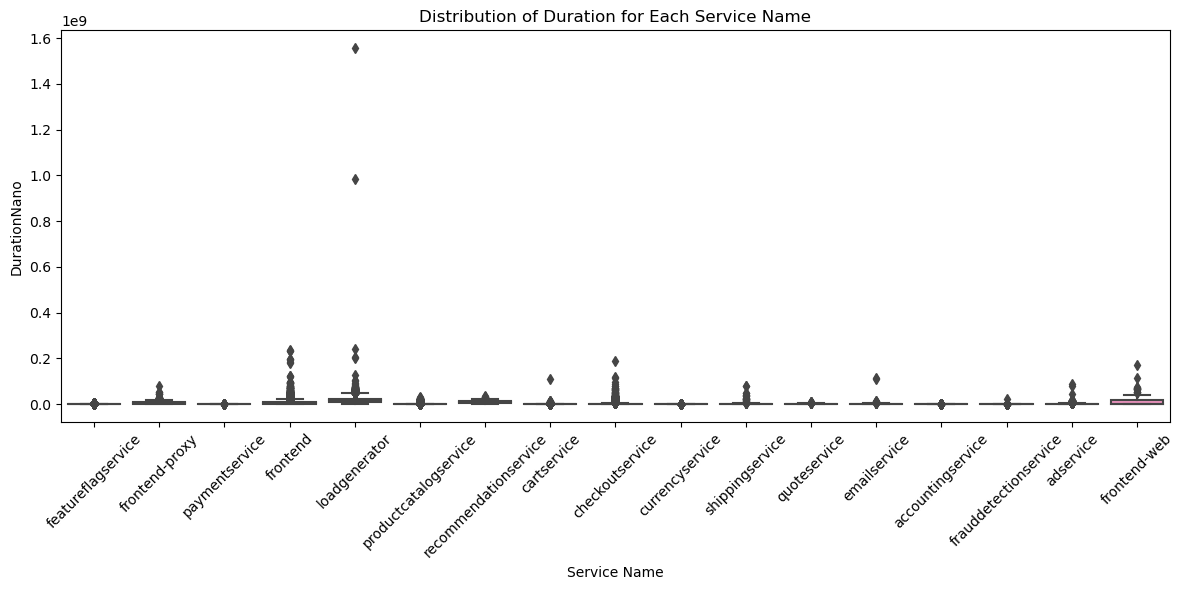

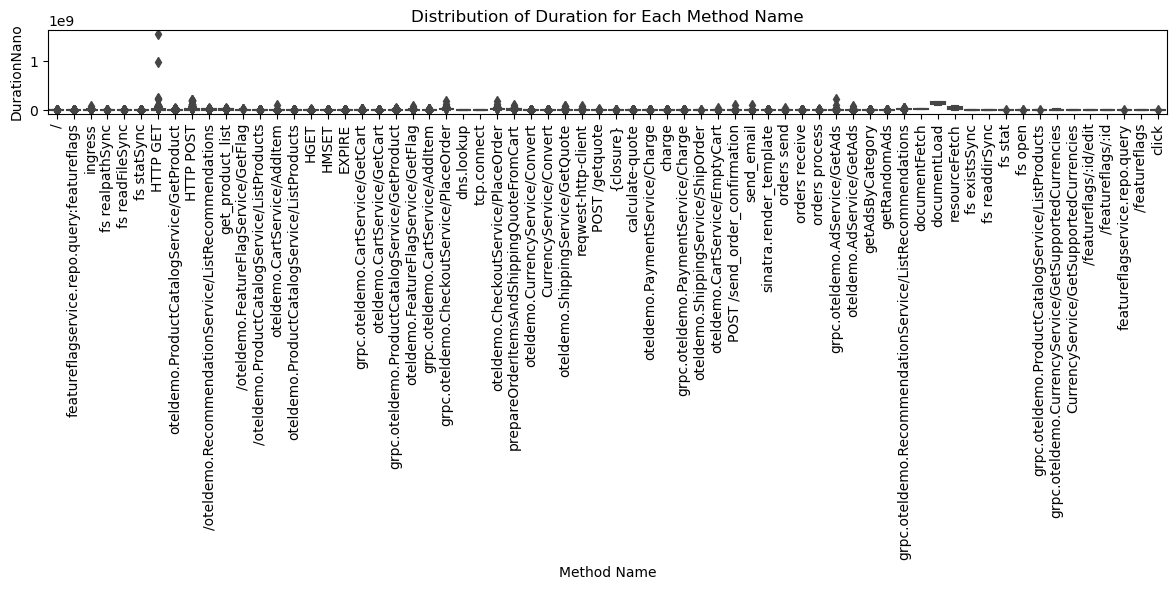

In [396]:
#Ans to 1st b
# Assuming df is your DataFrame
# Plot distribution of duration for each service name
plt.figure(figsize=(12, 6))
sns.boxplot(x='serviceName', y='durationNano', data=df)
plt.xticks(rotation=45)
plt.title('Distribution of Duration for Each Service Name')
plt.xlabel('Service Name')
plt.ylabel('DurationNano')
plt.tight_layout()
plt.show()

# Plot distribution of duration for each method name
plt.figure(figsize=(12, 6))
sns.boxplot(x='Name', y='durationNano', data=df)
plt.xticks(rotation=90)
plt.title('Distribution of Duration for Each Method Name')
plt.xlabel('Method Name')
plt.ylabel('DurationNano')
plt.tight_layout()
plt.show()


In [ ]:
#For serviceName x DurationNAno,the highest outlier we can observe is in loadgenerator
#For Name x DurationNano,the highest outlier observed is in HTTP GET

In [ ]:
#Outliers are data points that are far away from usual observation....

In [ ]:
#Ans to 2
'''Unsupervised Learning - Clustering: Use clustering algorithms such as K-means
    or DBSCAN to group spans based on their duration. Anomalies can be identified 
    as spans that do not belong to any cluster or are in clusters with significantly 
    different characteristics. This approach is suitable because it doesn't require 
    labeled data and can identify anomalies based solely on the distribution of durations.'''


'''Supervised Learning - Classification: Train a classification model 
(e.g., Random Forest, SVM) to classify spans as normal or anomalous based on their 
duration and other relevant features. You can label spans with durations beyond a certain 
threshold as anomalies. This approach allows you to leverage labeled data to train a model to 
distinguish between normal and anomalous spans.'''

'''Time Series Analysis: Use time series analysis techniques such as ARIMA or Prophet to 
model the temporal patterns in span durations. Anomalies can be identified as data points 
that deviate significantly from the predicted values. This approach is suitable for detecting 
anomalies in time-series data and can capture seasonality and trends in span durations.'''

In [398]:
filtered_df = df[(df["durationNano"] > lower_lim) & (df["durationNano"] < upper_lim)]

In [401]:
len(filtered_df)

164760

<AxesSubplot:>

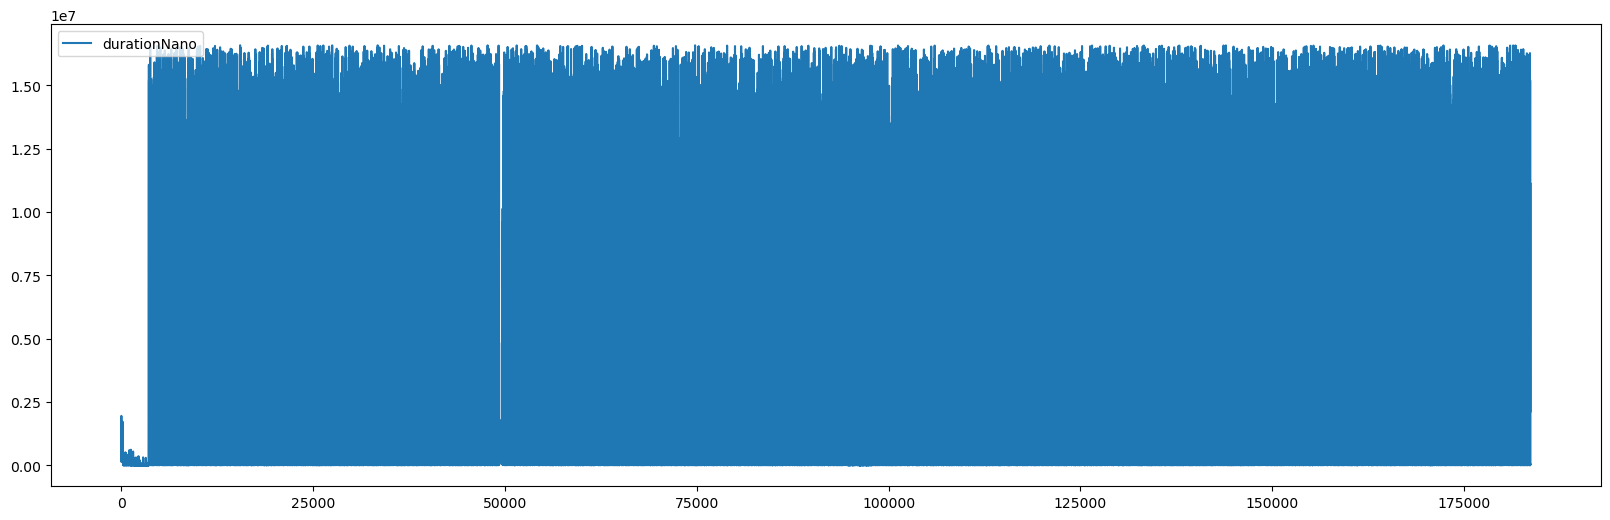

In [406]:
filtered_df.plot(figsize=(20,6))

In [404]:
"""It is a uniformly distributed data.At somewhere  around 50000 we are 
getting anomaly in the pattern of data
"""